<a name="home-id"></a>
# **Mengolah Data Teks Unstructured dengan REGEX pada Python (Source : DQLab)**

## **Materi**

<a name="sec1-id"></a>
### Notasi Regular Expression (regex)


<a name="nr"></a>
Regular Expression (regex) menyediakan beberapa karakter spesial yang dapat digunakan untuk mencocokan karakter dengan pola – pola tertentu. Notasi regex dapat juga dikombinasikan sesuai dengan kebutuhan dengan memperhatikan tiap kriteria notasi regex.

---



Perhatikan symbol dan notasi regex berikut:

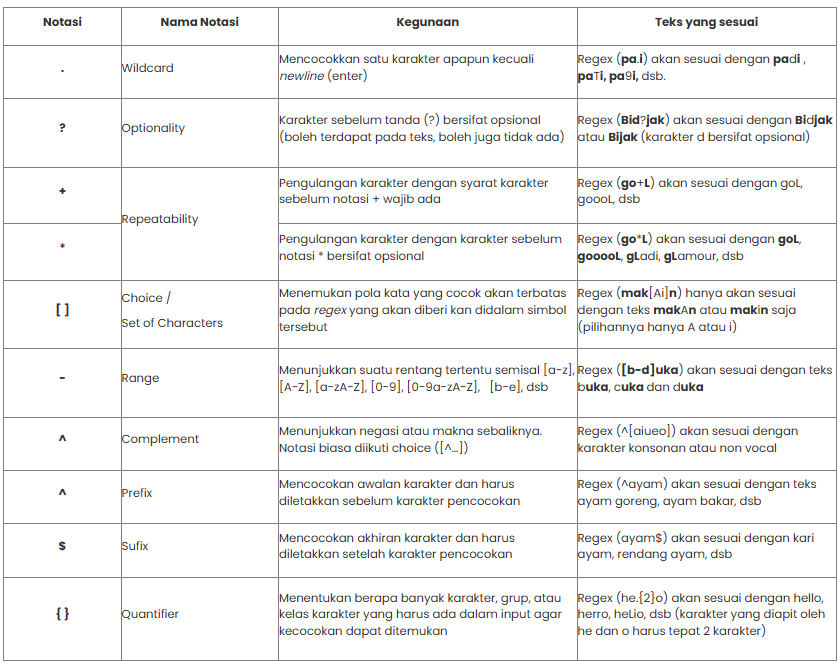

<a name="sec2-id"></a>
### Sets dan Group

<a name="sg"></a>
Sets adalah himpunan karakter di dalam sepasang tanda kurung siku [ ] dengan arti khusus sedangkan group atau biasa disebut juga capture and group adalah pengumpulan notasi regex untuk dikelompokkan dengan notasi kurung buka dan tutup ( ).

---
Perhatikan contoh sets berikut :
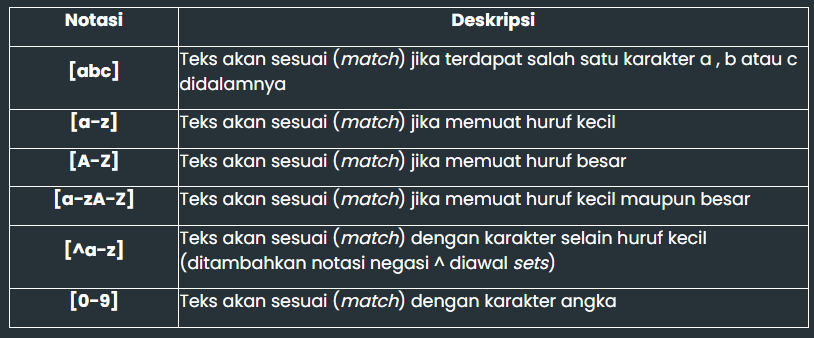

---
Pada group bisa mengelompokkan beberapa notasi regex dengan simbol ( ), sedangkan untuk me-return nilai dari group bisa menggunakan simbol \\. Perhatikan contoh berikut.

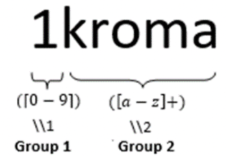

In [ ]:
'''
Semisal ingin mengubah dari 1kroma menjadi kroma-1
maka bisa gunakan sintaks :
'''
#replace("1kroma", "()()", "\\2-\\1")
'''
sehingga akan diperoleh teks baru yakni "kroma-1"
karena kita telah mengubah posisi group 2 (\\2) diawal,
lalu karakter strip ( - ) kemudian group 1 (\\1) diakhir.
'''

### Sintaks Contains

Sintaks 'contains' adalah sintaks pada python untuk pencocokan teks pada dataframe pandas yang mendukung notasi regex. Setelah browsing di internet, dia menemukan sintaks 'contains' yang mempunyai template sebagai berikut:



> pandas.Series.str.contains

> Series.str.contains(pat, case=True, flags=0, na=None, regex=True)


Sintaks contains digunakan untuk menguji apakah pola kata atau regex terkandung dalam string atau tidak.Jika sesuai maka akan tampil True dan sebaliknya jika tidak sesuai maka akan tampil False pada outputnya. Parameter yang bisa digunakan pada sintaks contains adalah sebagai berikut:


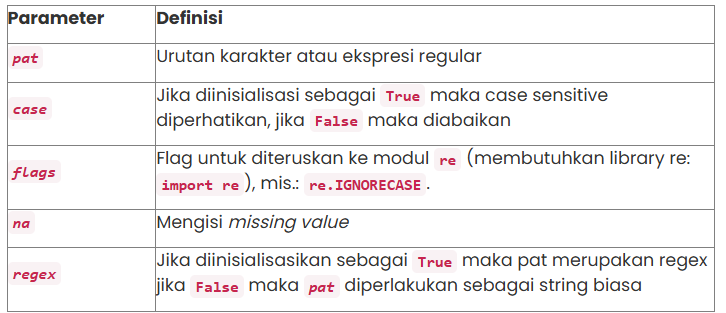

parameter yang wajib diinisialisasikan hanya pat saja selebihnya tidak harus diinisialisasikan karena sudah tersimpan pengaturan default-nya. Jadi sesuaikan saja dengan kebutuhan.





### Sintaks Replace

Sintaks replace umumnya adalah sintaks yang digunakan untuk mengganti suatu kata yang sesuai dengan regex ataupun bentuk kata lain dengan format lain yang diinginkan.

> pandas.Series.str.replace

> Series.str.replace(pat, repl, n=-1, case=None, flags=0, regex=None)


Sintaks replace digunakan untuk mengubah satu atau lebih karakter yang ingin diubah menjadi karakter atau string lainnya.

---
Parameter yang bisa digunakan pada sintaks replace adalah sebagai berikut :
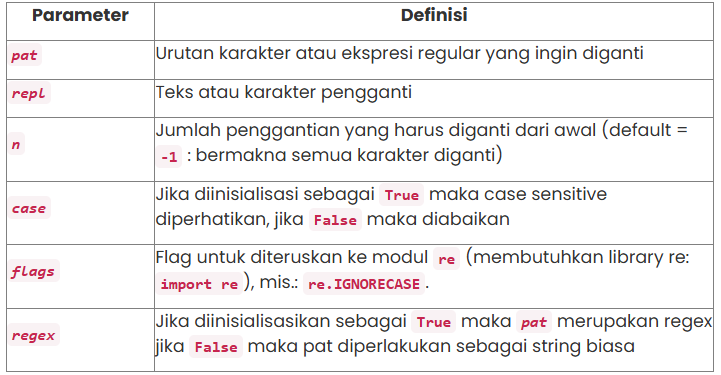

Parameter yang wajib diinisialisasikan hanya pat dan repl selebihnya tidak harus diinisialisasikan karena sudah tersimpan pengaturan default-nya. Jadi sesuaikan saja dengan kebutuhan.

### Tambahan Materi

<a name="lr"></a>
[Libary Re (ReGex) pada Python](https://www.revou.co/panduan-teknis/regex-python) cr : RevoU

##**Praktik**

### Library

In [12]:
import pandas as pd
import re

In [36]:
#Baca file dqlabregex.tsv
dqlabregex = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/dqlabregex.tsv", sep = '\t')

### Implementasi Sintaks Contains

#### Awalan J atau S

Penggunaan regex '^j|s' ditujukan untuk mencocokkan record pada field kota yang mana diawali dengan huruf J atau S

Lalu,
>^ berlaku sebagai prefix dimana mencocokkan awalan karakter

>j|s untuk menandai yang ingin dicari adalah awalan J atau S

[Notasi Regex](#nr)

In [ ]:
#Buat kolom baru kota_awalan_J_S
dqlabregex['kota_awalan_J_S'] = dqlabregex['kota'].str.contains('^j|s', case = False)

#Tampilkan hasilnya
print(dqlabregex[['kota','kota_awalan_J_S']])

       kota  kota_awalan_J_S
0   Jakarta             True
1   Jakarta             True
2   Bandung            False
3   Bandung            False
4  Semarang             True
5  Semarang             True


#### Mencari Senja, Sendja, SenDja, Sen_ja

Penggunaan regex 'Sen.?ja' ditujukan untuk mencocokkan record pada field staf_pencatat yang mencakup semua variasi nama Senja

Lalu,
>. menandakan dapat diisi oleh karakter apa pun

>? menandakan karakter sebelum tanda tanya bersifat opsional dimana boleh ada dan tidak ada

[Notasi Regex](#nr)


In [ ]:
#Buat kolom baru pencatat_senja
dqlabregex['pencatat_senja'] = dqlabregex['staf_pencatat'].str.contains('Sen.?ja')

#Tampilkan hasilnya
print(dqlabregex[['staf_pencatat','pencatat_senja']])

  staf_pencatat  pencatat_senja
0         Andra           False
1         Andra           False
2        Antara           False
3        Antara           False
4         Senja            True
5        Sendja            True


#### Karakter Non-numerik

Penggunaan regex '[0-9]' ditujukan untuk mencocokkan record pada field jumlah_member yang hanya berisi karakter numerik saja

[Sets and Group](#sg)

In [ ]:
#Buat kolom baru char_nonnumerik untuk mengetahui jumlah_member non numerik
dqlabregex['char_nonnumerik'] = dqlabregex['jumlah_member'].str.contains('[0-9]')

#Tampilkan hasilnya
print(dqlabregex[["jumlah_member","char_nonnumerik"]])

### Implementasi Sintaks Replace



#### Variasi Senja (Sendja, Sen_ja) -> Senja Only

In [ ]:
#Ubah kata Sendja, dsb menjadi Senja pada kolom staf_pencatat
dqlabregex['staf_pencatat'] = dqlabregex['staf_pencatat'].str.replace('Sen.?ja', 'Senja')

#Tampilkan hasilnya
print(dqlabregex[['staf_pencatat']])

  staf_pencatat
0         Andra
1         Andra
2        Antara
3        Antara
4         Senja
5        Sendja


#### Mengganti Karakter Non Numerik

Penggunaan regex '[^0-9]' ditujukan untuk mengganti record yang memuat karakter bukan numerik

> ^ digunakan di dalam kurung siku menandakan negasi dan bukan prefix

> [0-9] menandakan karakter numerik

[Notasi Regex](#nr)

[Sets and Group](#sg)

In [9]:
#Sintaks menghapus karakter non-numerik pada kolom jumlah_member
dqlabregex['jumlah_member'] = dqlabregex['jumlah_member'].str.replace('[^0-9]', '', regex=True)

#Tampilkan hasilnya
print(dqlabregex[['jumlah_member']])

  jumlah_member
0           311
1            12
2            50
3           670
4            81
5            12


#### Merubah Karakter Non-Numerik dengan Ketentuan Khusus

**Ketentuan**
1. Ubah karakter O atau o menjadi 0 (nol)
2. Ubah karakter I atau i menjadi 1 (satu)
3. Ubah karakter S atau s menjadi 5 (lima)


In [ ]:
#Ubah karakter pada kolom jumlah_member sesuai ketentuan
mapchange = {'O':'0', 'I':'1', 'S':'5'}
dqlabregex['jumlah_member_clean'] = dqlabregex['jumlah_member']

for ubah, pengubah in mapchange.items():
	dqlabregex['jumlah_member_clean'] = dqlabregex['jumlah_member_clean'].str.replace(ubah, pengubah, case = False)

#Tampilkan hasilnya
print(dqlabregex[['jumlah_member', 'jumlah_member_clean']])

  jumlah_member jumlah_member_clean
0           311                 311
1           1I2                 112
2           5S0                 550
3           670                 670
4           81O                 810
5           1O2                 102


Dengan menggunakan dictionary yang berisi pemetaan antara karakter yang ingin diubah dengan karakter pengubah {'O' : '0', 'I' : '1', 'S':'5'} lalu lakukan looping dengan mengambil tiap elemennya maka karakter huruf akan diganti dengan angka sesuai pemetaannya. Inisialisasi parameter case pada sintaks replace menjadi False agar sintaks mengabaikan besar - kecilnya huruf. Ketika sintaks dijalankan akan diperoleh jumlah_member_clean yang berisi numerik saja. Dengan menampilkan kedua kolom, terlihat perbandingan sebelum dan sesudah penggantian.

Inisialisasi awal kolom jumlah_member_clean dengan jumlah_member untuk memastikan ketika proses looping tidak adanya pengulangan sehingga semua item pada map terganti dan tidak hanya 1 item saja yg terganti

In [ ]:
#Ubah karakter pada kolom jumlah_member sesuai ketentuan
mapchange = {'O':'0', 'I':'1', 'S':'5'}

for ubah, pengubah in mapchange.items():
	dqlabregex['jumlah_member_clean'] = dqlabregex['jumlah_member'].str.replace(ubah, pengubah, case = False)

#Tampilkan hasilnya
print(dqlabregex[['jumlah_member', 'jumlah_member_clean']])

  jumlah_member jumlah_member_clean
0           311                 311
1           1I2                 1I2
2           5S0                 550
3           670                 670
4           81O                 81O
5           1O2                 1O2


#### Merapikan Tanggal

In [ ]:
#Sintaks merapikan format tanggal pada kolom tanggal_catat
dqlabregex['tanggal_catat'] = dqlabregex['tanggal_catat'].str.replace(r'([0-9]{2})-([0-9]{2})-([0-9]{4})',r'\\2/\\1/\\3', regex=True)

#Tampilkan hasilnya
print(dqlabregex[['tanggal_catat']])

### Praktik Keseluruhan

In [40]:
print("Tabel A:")
print(dqlabregex)

#Ubah karakter pada kolom jumlah_member sesuai ketentuan
mapchange = {'([0-9]{2})-([0-9]{2})-([0-9]{4})': '\\3-\\2-\\1', '([0-9]{2})/([0-9]{2})/([0-9]{4})' : '\\3-\\1-\\2'}
for ubah, pengubah in mapchange.items():  dqlabregex['tanggal_catat']=dqlabregex['tanggal_catat'].str.replace(ubah, pengubah)

dqlabregex['tanggal_catat'] = pd.to_datetime(dqlabregex['tanggal_catat'])

#Hapus karakter non numerik pada kolom jumlah_member dan ubah tipedatanya menjadi integer
dqlabregex['jumlah_member'] = dqlabregex['jumlah_member'].str.replace('[^0-9]','')
dqlabregex['jumlah_member'] = dqlabregex['jumlah_member'].astype('int')

#Ubah kata Sendja ataupun padanannya menjadi satu kata 'Senja' pada kolom staf_pencatat
dqlabregex['staf_pencatat'] = dqlabregex['staf_pencatat'].str.replace('Sen.?ja', 'Senja')

#Tampilkan hasilnya
print("\nTabel B:")
print(dqlabregex)

Tabel A:
   no_pencatatan tanggal_catat      kota  jumlah_member staf_pencatat
0              1    2020-05-01   Jakarta            311         Andra
1              2    2020-06-30   Jakarta             12         Andra
2              3    2020-05-02   Bandung             50        Antara
3              4    2020-06-28   Bandung            670        Antara
4              5    2020-05-10  Semarang             81         Senja
5              6    2020-06-28  Semarang             12        Sendja


AttributeError: 'Series' object has no attribute 'str_replace'

### **Notes**

Pada praktik keseluruhan ketika dijalankan di luar compiler pada dqlab akan menimbulkan error karena str.replace() sekarang tidak dapat mencapture group karena mungkin terdapat bug sehingga kita bisa menggunakan alternatif lain dengan menggunakan library re -> sintaks re.sub()

In [37]:
print("Tabel A:")
print(dqlabregex)

#Ubah karakter pada kolom jumlah_member sesuai ketentuan
def ubah_format_tanggal(tanggal):
    # Mengganti format dd-mm-yyyy menjadi yyyy-mm-dd
    tanggal = re.sub(r'(\d{2})-(\d{2})-(\d{4})', r'\3-\2-\1', tanggal)
    # Mengganti format dd/mm/yyyy menjadi yyyy-mm-dd
    tanggal = re.sub(r'(\d{2})/(\d{2})/(\d{4})', r'\3-\1-\2', tanggal)
    return tanggal

# Terapkan fungsi ke kolom 'tanggal_catat'
dqlabregex['tanggal_catat'] = dqlabregex['tanggal_catat'].apply(ubah_format_tanggal)

# Mengonversi kolom tanggal_catat menjadi datetime
dqlabregex['tanggal_catat'] = pd.to_datetime(dqlabregex['tanggal_catat'], format="%Y-%m-%d")

#Hapus karakter non numerik pada kolom jumlah_member dan ubah tipedatanya menjadi integer
dqlabregex['jumlah_member'] = dqlabregex['jumlah_member'].str.replace('[^0-9]','', regex=True)
dqlabregex['jumlah_member'] = dqlabregex['jumlah_member'].astype('int')

#Ubah kata Sendja ataupun padanannya menjadi satu kata 'Senja' pada kolom staf_pencatat
dqlabregex['staf_pencatat'] = dqlabregex['staf_pencatat'].str.replace('Sen.?ja', 'Senja')

#Tampilkan hasilnya
print("\nTabel B:")
print(dqlabregex)

Tabel A:
   no_pencatatan tanggal_catat      kota jumlah_member staf_pencatat
0              1    01-05-2020   Jakarta           311         Andra
1              2    30-06-2020   Jakarta           1I2         Andra
2              3    05/02/2020   Bandung           5S0        Antara
3              4    06/28/2020   Bandung           670        Antara
4              5    05/10/2020  Semarang           81O         Senja
5              6    06/28/2020  Semarang           1O2        Sendja

Tabel B:
   no_pencatatan tanggal_catat      kota  jumlah_member staf_pencatat
0              1    2020-05-01   Jakarta            311         Andra
1              2    2020-06-30   Jakarta             12         Andra
2              3    2020-05-02   Bandung             50        Antara
3              4    2020-06-28   Bandung            670        Antara
4              5    2020-05-10  Semarang             81         Senja
5              6    2020-06-28  Semarang             12        Sendja


[Library Regex](#lr)